In [2]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
#Importing the data from the csv file
data = pd.read_csv(r"C:\Users\ADORABELLA\Documents\GODWIN\CAREER\DATA ANALYST\PORTFOLIO\Rune Tutorials\Financial Analysis\AAPL.csv", index_col=0, parse_dates=True)

In [4]:
#Reading the data
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-03,135.759995,135.770004,133.610001,133.940002,133.119339,89880900
2021-02-04,136.300003,137.399994,134.589996,137.389999,136.548218,84183100
2021-02-05,137.350006,137.419998,135.860001,136.759995,136.125168,75693800
2021-02-08,136.029999,136.960007,134.919998,136.910004,136.274490,71297200
2021-02-09,136.619995,137.880005,135.850006,136.009995,135.378647,76774200


In [5]:
#Adding new columns to the dataframe for analysis
data['%-chg'] = data['Close'].pct_change()

In [6]:
#Looking at the dataframe
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg
Date,,,,,,,
2021-02-03,135.759995,135.770004,133.610001,133.940002,133.119339,89880900,NaN
2021-02-04,136.300003,137.399994,134.589996,137.389999,136.548218,84183100,0.025758
2021-02-05,137.350006,137.419998,135.860001,136.759995,136.125168,75693800,-0.004586
2021-02-08,136.029999,136.960007,134.919998,136.910004,136.274490,71297200,0.001097
2021-02-09,136.619995,137.880005,135.850006,136.009995,135.378647,76774200,-0.006574


In [7]:
#To confirm the data
(137.389999-133.940002)/133.940002

0.02575777921819052

In [9]:
#To get the log value of the %-chg, I have to import the numpy library
import numpy as np

In [10]:
data['Log returns'] = np.log(data['Close']/data['Close'].shift())

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns
Date,,,,,,,,
2021-02-03,135.759995,135.770004,133.610001,133.940002,133.119339,89880900,NaN,NaN
2021-02-04,136.300003,137.399994,134.589996,137.389999,136.548218,84183100,0.025758,0.025432
2021-02-05,137.350006,137.419998,135.860001,136.759995,136.125168,75693800,-0.004586,-0.004596
2021-02-08,136.029999,136.960007,134.919998,136.910004,136.274490,71297200,0.001097,0.001096
2021-02-09,136.619995,137.880005,135.850006,136.009995,135.378647,76774200,-0.006574,-0.006595


In [13]:
#To get the daily standard devaition
data['Log returns'].std()

0.015568994571926783

In [16]:
#To get the annual standard deviation,(volatility)
#I multiply the daily standard devaition by 252 because there are approximately 252 trading days in a year.
volatility = data['Log returns'].std()*252**.5

In [17]:
volatility

0.2471501268037967

In [19]:
#To round up the volatility figures
str_vol = str(round(volatility, 4)*100)

In [20]:
str_vol

'24.72'

<IPython.core.display.Javascript object>


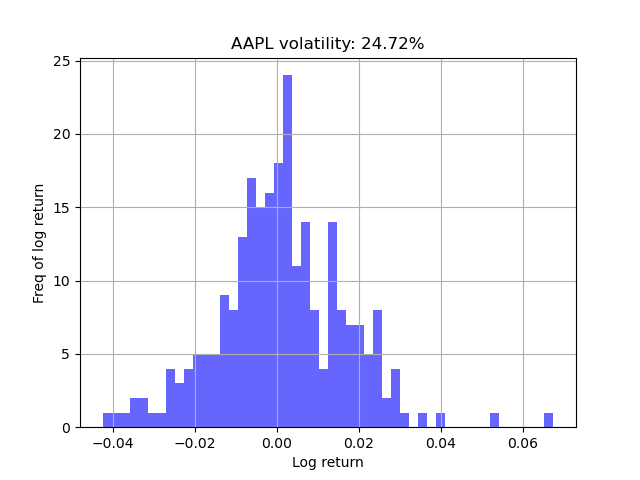

Text(0.5, 1.0, 'AAPL volatility: 24.72%')

In [21]:
#To get a bar chart of the volatility
fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("AAPL volatility: " + str_vol + "%")

In [22]:
#To get the moving average
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns
Date,,,,,,,,
2021-02-03,135.759995,135.770004,133.610001,133.940002,133.119339,89880900,NaN,NaN
2021-02-04,136.300003,137.399994,134.589996,137.389999,136.548218,84183100,0.025758,0.025432
2021-02-05,137.350006,137.419998,135.860001,136.759995,136.125168,75693800,-0.004586,-0.004596
2021-02-08,136.029999,136.960007,134.919998,136.910004,136.274490,71297200,0.001097,0.001096
2021-02-09,136.619995,137.880005,135.850006,136.009995,135.378647,76774200,-0.006574,-0.006595


In [24]:
data['MA10'] = data['Close'].rolling(10).mean()

In [25]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10
Date,,,,,,,,,
2022-01-27,162.449997,163.839996,158.279999,159.220001,159.220001,121954600,-0.002943,-0.002948,164.852000
2022-01-28,165.710007,170.350006,162.800003,170.330002,170.330002,179935700,0.069778,0.067451,164.666000
2022-01-31,170.160004,175.000000,169.509995,174.779999,174.779999,115541600,0.026126,0.025790,164.837000
2022-02-01,174.009995,174.839996,172.309998,174.610001,174.610001,86213900,-0.000973,-0.000973,165.317999
2022-02-02,174.750000,175.880005,173.330002,175.839996,175.839996,79172100,0.007044,0.007020,166.278999


In [26]:
#To get the exponential moving average
data['EMA10'] = data['Close'].ewm(span=10, adjust=False).mean()

In [27]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10,EMA10
Date,,,,,,,,,,
2022-01-27,162.449997,163.839996,158.279999,159.220001,159.220001,121954600,-0.002943,-0.002948,164.852000,164.099294
2022-01-28,165.710007,170.350006,162.800003,170.330002,170.330002,179935700,0.069778,0.067451,164.666000,165.232150
2022-01-31,170.160004,175.000000,169.509995,174.779999,174.779999,115541600,0.026126,0.025790,164.837000,166.968123
2022-02-01,174.009995,174.839996,172.309998,174.610001,174.610001,86213900,-0.000973,-0.000973,165.317999,168.357555
2022-02-02,174.750000,175.880005,173.330002,175.839996,175.839996,79172100,0.007044,0.007020,166.278999,169.717999


<IPython.core.display.Javascript object>


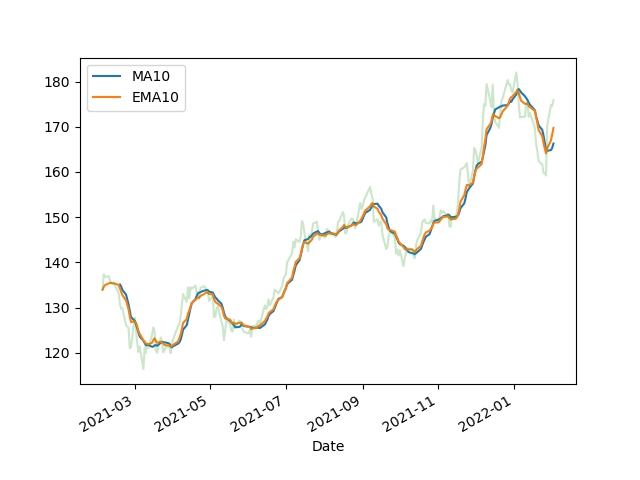

<AxesSubplot:xlabel='Date'>

In [28]:
#To get the visuals
fig, ax = plt.subplots()
data[['MA10', 'EMA10']].loc['2020-12-01':].plot(ax=ax)
data['Close'].loc['2020-12-01':].plot(ax=ax, alpha=0.25)

In [ ]:
# The exponential moving average seems to be slightly more volatile than the moving average.